In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#from google.colab import files
 
#uploaded = files.upload()

In [ ]:
step1 = pd.read_excel('Untitled spreadsheet.xlsx')
step1
# number_person=step1["Consentement"].count()
# number_person

,No,Code d'utilisateur,No Groupe,Consentement,genre,age,situation_prof,niv_etude,perte_emploi,aide_fin_gouv,aide_fin_autre,aide_fin_autre_mointant,aide_fin_autre_mointant_devise,revenu,revenu_devise,lieu_res,taille,poids,IMC,changement_ponderal,prise_poids,perte_poids,1habitation_contexte,1nbr_enfant,1nbr_pers,1nbr_coloc,1nbr_amis,1situation_autre_habitation,2habitation_contexte,2nbr_enfant,2nbr_pers,2nbr_coloc,2nbr_amis,2situation_autre_habitation,2changement_habit,2suivi_med,routine_meilleure,changement_soins_t2,2type_soins_moins,2type_soins_plus,...,2eed8,2eed9,2eed10,2eed11,2eed12,2eed13,2eed14,2eed15,2eed16,2eed17,2eed18,2eed19,2respect_recommandations,2respect_lavage,2respect_distancia,2respect_masque,2respect_prot_indiv,2trav_essentiel,2travail_continuer,2teletravail,2acces_confinement,2opinion,CEeed_t2,POSeed_t2,BODeed_t2,SHAeed_t2,Bdedi_t2,Dtedi_t2,Buedi_t2,Inedi_t2,Idedi_t2,Iaedi_t2,UPEies_t,EPRies_t2,HSCies_t2,BCCies_t2,TOTies_t2,RESedeq_t2,Ecedeq_t2,OSA_t2.1
0,1.0,3387819.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!
1,2.0,3387834.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!
2,3.0,3387859.0,NaN,1.0,2.0,42.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0,1.0,170.0,51.0,17.647059,3.0,NaN,NaN,3.0,,NaN,NaN,NaN,NaN,3.0,,NaN,NaN,NaN,NaN,2.0,3.0,1.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!
3,4.0,3387861.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!
4,5.0,3387863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2986,2987.0,3599981.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!
2987,2988.0,3601069.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!
2988,2989.0,3601323.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
step1['Consentement'] = step1['Consentement'].fillna(0)

In [ ]:
step1.astype({'Consentement': 'int32'}).dtypes
step1.head(5)

,No,Code d'utilisateur,No Groupe,Consentement,genre,age,situation_prof,niv_etude,perte_emploi,aide_fin_gouv,aide_fin_autre,aide_fin_autre_mointant,aide_fin_autre_mointant_devise,revenu,revenu_devise,lieu_res,taille,poids,IMC,changement_ponderal,prise_poids,perte_poids,1habitation_contexte,1nbr_enfant,1nbr_pers,1nbr_coloc,1nbr_amis,1situation_autre_habitation,2habitation_contexte,2nbr_enfant,2nbr_pers,2nbr_coloc,2nbr_amis,2situation_autre_habitation,2changement_habit,2suivi_med,routine_meilleure,changement_soins_t2,2type_soins_moins,2type_soins_plus,...,2eed8,2eed9,2eed10,2eed11,2eed12,2eed13,2eed14,2eed15,2eed16,2eed17,2eed18,2eed19,2respect_recommandations,2respect_lavage,2respect_distancia,2respect_masque,2respect_prot_indiv,2trav_essentiel,2travail_continuer,2teletravail,2acces_confinement,2opinion,CEeed_t2,POSeed_t2,BODeed_t2,SHAeed_t2,Bdedi_t2,Dtedi_t2,Buedi_t2,Inedi_t2,Idedi_t2,Iaedi_t2,UPEies_t,EPRies_t2,HSCies_t2,BCCies_t2,TOTies_t2,RESedeq_t2,Ecedeq_t2,OSA_t2.1
0,1.0,3387819.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!
1,2.0,3387834.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!
2,3.0,3387859.0,NaN,1.0,2.0,42.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0,1.0,170.0,51.0,17.647059,3.0,NaN,NaN,3.0,,NaN,NaN,NaN,NaN,3.0,,NaN,NaN,NaN,NaN,2.0,3.0,1.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!
3,4.0,3387861.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!
4,5.0,3387863.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!


In [ ]:
step1.isnull().sum().sum()


668800

Extract only consentement ==1

In [ ]:
step2 = step1.loc[(step1['Consentement'] == 1)]
step2

,No,Code d'utilisateur,No Groupe,Consentement,genre,age,situation_prof,niv_etude,perte_emploi,aide_fin_gouv,aide_fin_autre,aide_fin_autre_mointant,aide_fin_autre_mointant_devise,revenu,revenu_devise,lieu_res,taille,poids,IMC,changement_ponderal,prise_poids,perte_poids,1habitation_contexte,1nbr_enfant,1nbr_pers,1nbr_coloc,1nbr_amis,1situation_autre_habitation,2habitation_contexte,2nbr_enfant,2nbr_pers,2nbr_coloc,2nbr_amis,2situation_autre_habitation,2changement_habit,2suivi_med,routine_meilleure,changement_soins_t2,2type_soins_moins,2type_soins_plus,...,2eed8,2eed9,2eed10,2eed11,2eed12,2eed13,2eed14,2eed15,2eed16,2eed17,2eed18,2eed19,2respect_recommandations,2respect_lavage,2respect_distancia,2respect_masque,2respect_prot_indiv,2trav_essentiel,2travail_continuer,2teletravail,2acces_confinement,2opinion,CEeed_t2,POSeed_t2,BODeed_t2,SHAeed_t2,Bdedi_t2,Dtedi_t2,Buedi_t2,Inedi_t2,Idedi_t2,Iaedi_t2,UPEies_t,EPRies_t2,HSCies_t2,BCCies_t2,TOTies_t2,RESedeq_t2,Ecedeq_t2,OSA_t2.1
0,1.0,3387819.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!
2,3.0,3387859.0,NaN,1.0,2.0,42.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0,1.0,170.0,51.0,17.647059,3.0,NaN,NaN,3.0,,NaN,NaN,NaN,NaN,3.0,,NaN,NaN,NaN,NaN,2.0,3.0,1.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!
5,6.0,3387866.0,NaN,1.0,2.0,30.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,1.0,165.0,59.0,21.671258,1.0,1.0,NaN,3.0,,NaN,NaN,NaN,NaN,3.0,,NaN,NaN,NaN,NaN,2.0,3.0,1.0,1.0,"Entra√Ænement, lavage de cheveux, maquillage, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!
6,7.0,3387868.0,1.0,1.0,2.0,22.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,176.0,77.0,24.857955,1.0,1.0,NaN,3.0,,NaN,NaN,NaN,NaN,3.0,,NaN,NaN,NaN,NaN,2.0,3.0,2.0,1.0,Moins de temps √† m‚Äôentra√Æner = une activit...,NaN,...,1.0,0.0,0.0,2.0,0.0,0.0,5.0,4.0,2.0,4.0,4.0,4.0,1.0,10.0,9.0,5.0,10.0,1.0,1.0,2.0,2.0,1.0,NaN,4.00,3.75,0.00,4.0,1.0,1.0,1.0,3.0,1.0,4.83,4.63,3.17,3.67,4.17,0.4,0.2,2.75875
7,8.0,3387878.0,1.0,1.0,2.0,24.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,1.0,165.0,68.0,24.977043,3.0,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,2.0,3.0,1.0,3.0,NaN,NaN,...,0.0,0.0,0.0,2.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,4.0,2.0,10.0,8.0,3.0,10.0,1.0,1.0,2.0,1.0,1.0,NaN,4.00,5.00,1.67,2.0,2.0,0.0,2.0,1.0,2.0,4.33,3.63,4.17,4.00,4.00,0.6,0.2,2.86625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,2454.0,3483398.0,NaN,1.0,1.0,30.0,6.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,2.0,3.0,170.0,48.0,16.608997,1.0,4.0,NaN,5.0,,2.0,NaN,NaN,NaN,10.0,,NaN,NaN,NaN,Clinique de soin contre les TCA,1.0,3.0,2.0,2.0,NaN,"Tout type, gu√©rison de mon anorexie boulimie.",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!
2456,2457.0,3483412.0,2.0,1.0,NaN,24.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,3.0,163.0,53.0,19.94806,2.0,NaN,1.0,3.0,,NaN,NaN,NaN,NaN,3.0,,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1.0,"maquillage, coiffure, habits",NaN,...,4.0,1.0,3.0,3.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,3.0,2.0,7.0,6.0,6.0,3.0,2.0,1.0,1.0,1.0,1.0,2.38,2.67,2.50,3.00,5.0,5.0,0.0,5.0,6.0,7.0,2.00,2.38,3.00,5.00,2.78,1.6,1.0,3.095
2784,2785.0,3486368.0,NaN,1.0,2.0,14.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1

In [ ]:
step2=step2.interpolate()

Separate to male and female

In [ ]:
step2G1 = step2.loc[(step1['genre'] == 1)]
step2G2= step2.loc[(step1['genre'] == 2)]
step2G2

,No,Code d'utilisateur,No Groupe,Consentement,genre,age,situation_prof,niv_etude,perte_emploi,aide_fin_gouv,aide_fin_autre,aide_fin_autre_mointant,aide_fin_autre_mointant_devise,revenu,revenu_devise,lieu_res,taille,poids,IMC,changement_ponderal,prise_poids,perte_poids,1habitation_contexte,1nbr_enfant,1nbr_pers,1nbr_coloc,1nbr_amis,1situation_autre_habitation,2habitation_contexte,2nbr_enfant,2nbr_pers,2nbr_coloc,2nbr_amis,2situation_autre_habitation,2changement_habit,2suivi_med,routine_meilleure,changement_soins_t2,2type_soins_moins,2type_soins_plus,...,2eed8,2eed9,2eed10,2eed11,2eed12,2eed13,2eed14,2eed15,2eed16,2eed17,2eed18,2eed19,2respect_recommandations,2respect_lavage,2respect_distancia,2respect_masque,2respect_prot_indiv,2trav_essentiel,2travail_continuer,2teletravail,2acces_confinement,2opinion,CEeed_t2,POSeed_t2,BODeed_t2,SHAeed_t2,Bdedi_t2,Dtedi_t2,Buedi_t2,Inedi_t2,Idedi_t2,Iaedi_t2,UPEies_t,EPRies_t2,HSCies_t2,BCCies_t2,TOTies_t2,RESedeq_t2,Ecedeq_t2,OSA_t2.1
2,3.0,3387859.0,NaN,1.0,2.0,42.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0,1.0,170.0,51.0,17.647059,3.0,NaN,NaN,3.0,,NaN,NaN,NaN,NaN,3.0,,NaN,NaN,NaN,NaN,2.0,3.0,1.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!
5,6.0,3387866.0,NaN,1.0,2.0,30.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,1.0,165.0,59.0,21.671258,1.0,1.000000,NaN,3.0,,NaN,NaN,NaN,NaN,3.0,,NaN,NaN,NaN,NaN,2.0,3.0,1.0,1.0,"Entra√Ænement, lavage de cheveux, maquillage, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#DIV/0!
6,7.0,3387868.0,1.0,1.0,2.0,22.0,4.0,4.000000,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,176.0,77.0,24.857955,1.0,1.000000,NaN,3.0,,NaN,NaN,NaN,NaN,3.0,,NaN,NaN,NaN,NaN,2.0,3.0,2.0,1.0,Moins de temps √† m‚Äôentra√Æner = une activit...,NaN,...,1.0,0.00,0.00,2.00,0.00,0.0,5.0,4.00,2.00,4.00,4.00,4.00,1.0,10.00,9.0,5.0,10.0,1.00,1.0,2.0,2.0,1.00,NaN,4.000,3.7500,0.0000,4.00,1.00,1.0,1.0,3.00,1.00,4.8300,4.6300,3.170,3.67,4.170,0.4,0.20,2.75875
7,8.0,3387878.0,1.0,1.0,2.0,24.0,3.0,3.666667,NaN,NaN,NaN,NaN,NaN,4.0,1.0,1.0,165.0,68.0,24.977043,3.0,1.083333,NaN,1.0,,NaN,NaN,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,2.0,3.0,1.0,3.0,NaN,NaN,...,0.0,0.00,0.00,2.00,1.00,1.0,5.0,5.00,5.00,5.00,5.00,4.00,2.0,10.00,8.0,3.0,10.0,1.00,1.0,2.0,1.0,1.00,NaN,4.000,5.0000,1.6700,2.00,2.00,0.0,2.0,1.00,2.00,4.3300,3.6300,4.170,4.00,4.000,0.6,0.20,2.86625
11,12.0,3387923.0,2.0,1.0,2.0,48.0,3.0,3.333333,NaN,NaN,NaN,NaN,NaN,4.0,1.0,1.0,165.0,61.0,22.405877,3.0,1.166667,NaN,3.0,,NaN,NaN,NaN,NaN,4.0,2,NaN,NaN,NaN,NaN,2.0,3.0,1.0,1.0,Coiffure,NaN,...,1.0,0.00,1.00,1.00,2.00,2.0,3.0,3.00,4.00,3.00,3.00,3.00,2.0,9.00,9.0,8.0,8.0,1.00,1.0,2.0,1 4 5 7,2.00,1.2500,2.670,3.2500,3.3300,7.00,6.00,1.0,6.0,3.00,4.00,3.1700,2.6300,3.000,4.00,3.040,1.0,0.20,2.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,2216.0,3480233.0,1.4,1.0,2.0,28.0,4.0,2.000000,1.968750,4.0,2.0,NaN,NaN,2.0,1.0,1.0,168.0,63.0,22.321429,1.0,2.000000,1.0,5.0,,1.0,NaN,1.0,NaN,5.0,,1.0,NaN,3.0,NaN,2.0,3.0,1.0,3.0,NaN,NaN,...,1.0,0.25,0.75,0.75,0.75,0.5,4.5,3.75,1.75,3.75,3.25,3.75,2.0,7.75,7.5,9.0,9.0,1.25,1.0,1.0,NaN,1.75,0.6925,3.915,3.4375,1.2525,5.75,1.25,1.5,3.5,2.25,1.75,4.1225,3.6925,4.200,5.00,3.956,0.4,0.25,#DIV/0!
2220,2221.0,3481297.0,1.6,1.0,2.0,18.0,4.0,2.000000,1.984375,4.0,2.0,NaN,NaN,2.0,1.5,2.0,NaN,55.5,#DIV/0!,1.0,3.000000,1.0,5.0,,NaN,NaN,1.0,NaN,7.5,,NaN,NaN,3.0,NaN,1.5,3.0,1.5,2.5,NaN,NaN,...,2.0,0.50,1.50,1.50,1.50,1.0,4.0,3.50,1.50,3.50,2.50,3.50,2.0,7.50,7.0,8.0,7.0,1.50,1.0,1.0,NaN,1.50,1.2550,3.500,3.1250,1.8350,5.50,2.50,1.0,

In [ ]:

select_genre='step2G'+str(input('please input genre for analysis (Enter only 1 or 2) :'))
genres={'step2G1':step2G1,'step2G2':step2G2}


print('Feature names are: RESedeq_t2,Buedi_t2,Bdedi_t2,BCCies_t2,EPRies_t2,HSCies_t2,UPEies_t')
A=list(input('please enter your feature names and split them with ",":').split(','))
n_C=int(input('please enter number of cluster:'))
print('if you have 6 columns, want to delet 1 column per cluster, should enter 5')
print('if you have 6 columns, want to delet 1,2 columns per cluster, should enter 4')
minimum_number_of_feature_in_Dataset_for_clustring=int(input('please input minimum number of features for clustering:'))
a=min(len(step1.columns),minimum_number_of_feature_in_Dataset_for_clustring)
from itertools import combinations
datasets=[]
for z in range(a,len(A)+1):
  temp = list(combinations(A, z))
  for i in list(temp):
    datasets.append(i)
for t in range(len(datasets)):
  datasets[t]=[str('droped:')+str(list(set(A)-set(list(datasets[t])))),genres[select_genre][list(datasets[t])]]
datasets
# RESedeq_t2,Buedi_t2,Bdedi_t2,BCCies_t2,EPRies_t2,HSCies_t2,UPEies_t

please input genre for analysis (Enter only 1 or 2) :1
Feature names are: RESedeq_t2,Buedi_t2,Bdedi_t2,BCCies_t2,EPRies_t2,HSCies_t2,UPEies_t
please enter your feature names and split them with ",":RESedeq_t2,Buedi_t2,Bdedi_t2,BCCies_t2,EPRies_t2,HSCies_t2,UPEies_t
please enter number of cluster:3
if you have 6 columns, want to delet 1 column per cluster, should enter 5
if you have 6 columns, want to delet 1,2 columns per cluster, should enter 4
please input minimum number of features for clustering:5


[["droped:['UPEies_t', 'HSCies_t2']",
        RESedeq_t2  Buedi_t2   Bdedi_t2  BCCies_t2  EPRies_t2
  115     1.800000  1.500000   7.000000   4.835000   3.380000
  159     1.700000  2.250000   2.750000   4.165000   2.940000
  184     0.300000  0.500000   3.500000   4.500000   3.875000
  210     3.533333  7.000000   8.333333   2.446667   2.583333
  265     0.000000  0.000000   3.000000   3.000000   4.250000
  480     0.000000  1.750000   4.000000   3.000000   3.375000
  514     0.000000  2.000000   7.000000   4.670000   2.630000
  692     0.200000  1.000000   4.000000   4.330000   4.130000
  723     0.700000  2.500000   8.000000   3.000000   2.505000
  732     1.850000  1.750000   9.500000   3.252500   2.692500
  763     0.933333  0.500000   4.500000   3.330000   2.916667
  785     0.000000  0.000000   2.000000   4.670000   3.750000
  800     0.000000  0.000000   7.000000   4.000000   2.630000
  885     0.000000  3.000000   7.500000   3.500000   2.440000
  906     0.000000  2.000000   2

In [ ]:
len(datasets)# set(A)-set(


29

# Heatmap of datasets before clustering

droped:['UPEies_t', 'HSCies_t2']


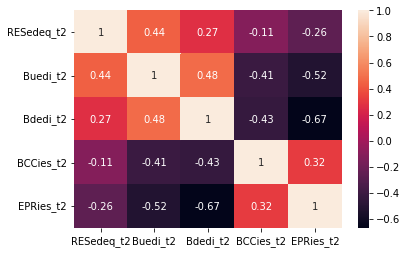

droped:['UPEies_t', 'EPRies_t2']


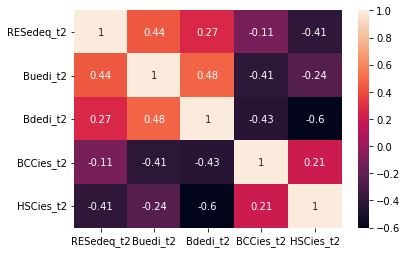

droped:['EPRies_t2', 'HSCies_t2']


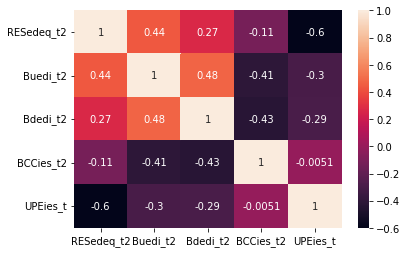

droped:['UPEies_t', 'BCCies_t2']


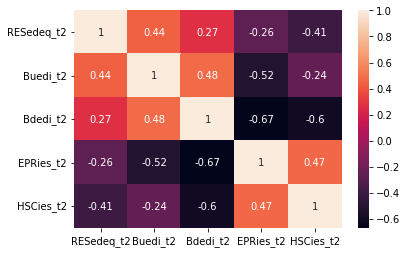

droped:['HSCies_t2', 'BCCies_t2']


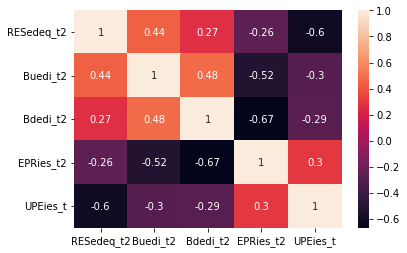

droped:['EPRies_t2', 'BCCies_t2']


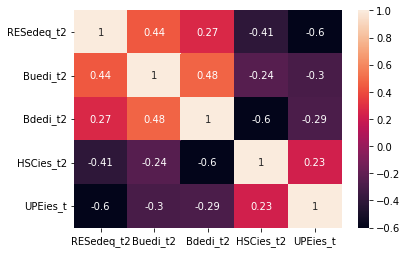

droped:['UPEies_t', 'Bdedi_t2']


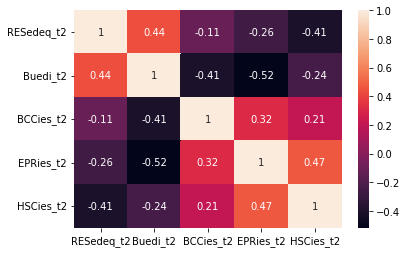

droped:['Bdedi_t2', 'HSCies_t2']


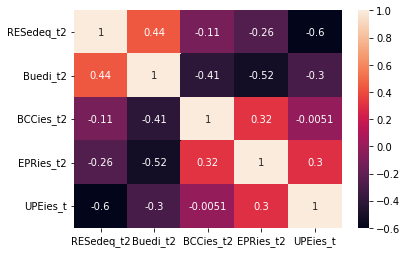

droped:['Bdedi_t2', 'EPRies_t2']


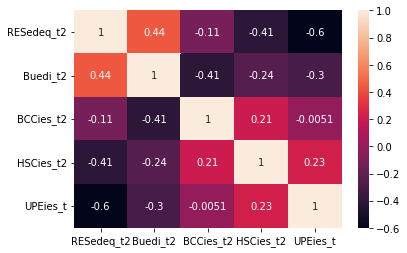

droped:['Bdedi_t2', 'BCCies_t2']


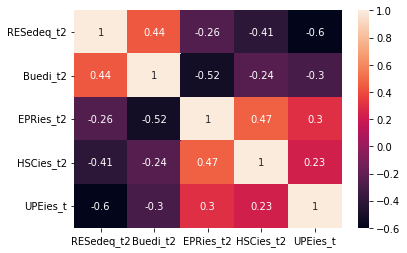

droped:['UPEies_t', 'Buedi_t2']


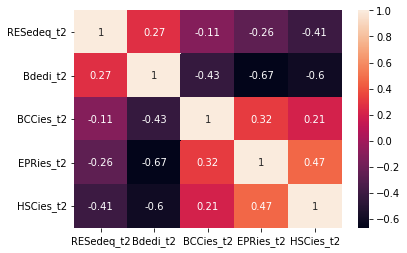

droped:['Buedi_t2', 'HSCies_t2']


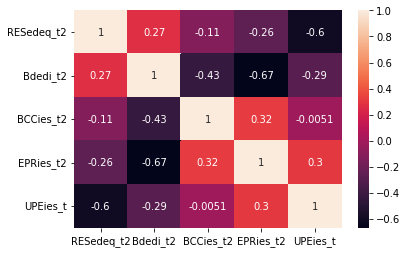

droped:['Buedi_t2', 'EPRies_t2']


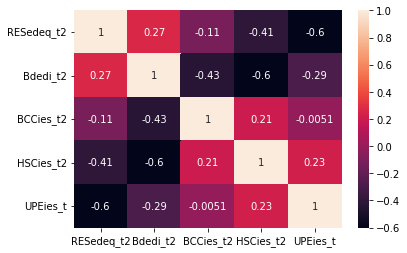

droped:['Buedi_t2', 'BCCies_t2']


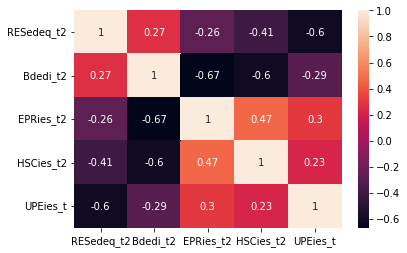

droped:['Buedi_t2', 'Bdedi_t2']


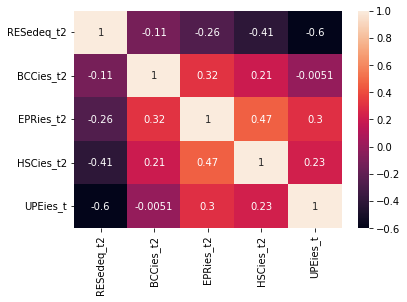

droped:['UPEies_t', 'RESedeq_t2']


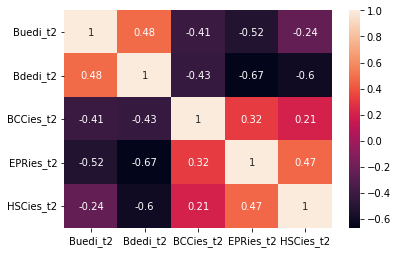

droped:['RESedeq_t2', 'HSCies_t2']


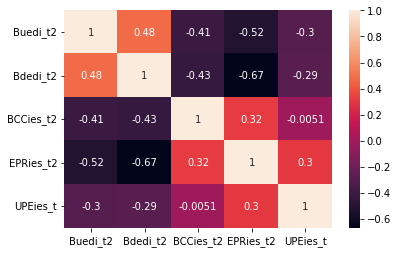

droped:['EPRies_t2', 'RESedeq_t2']


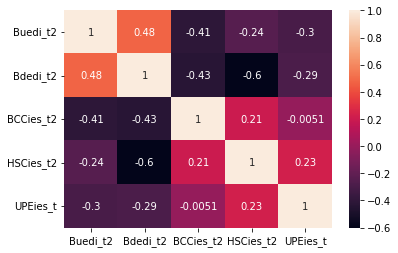

droped:['RESedeq_t2', 'BCCies_t2']


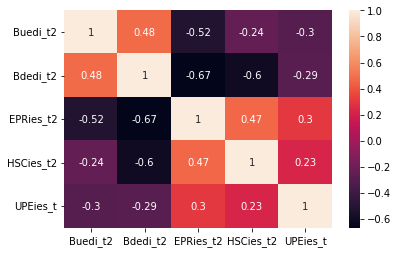

droped:['Bdedi_t2', 'RESedeq_t2']


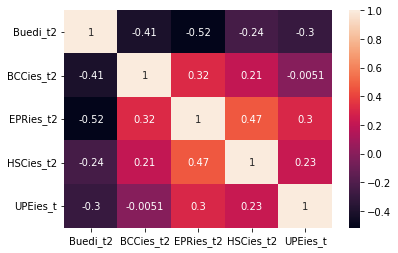

droped:['Buedi_t2', 'RESedeq_t2']


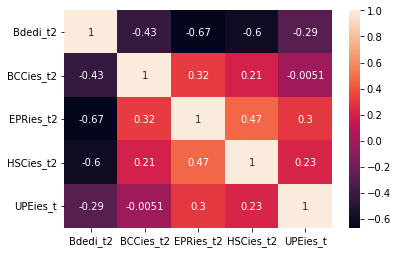

droped:['UPEies_t']


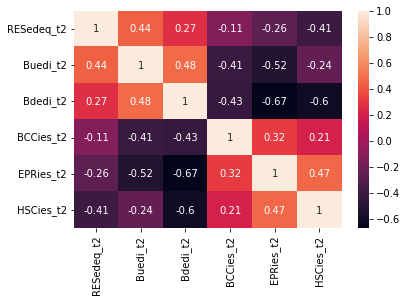

droped:['HSCies_t2']


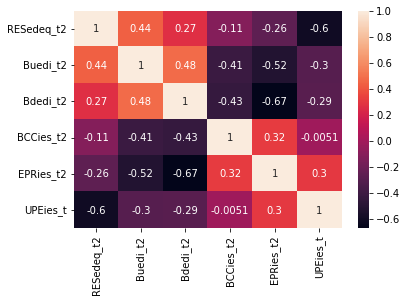

droped:['EPRies_t2']


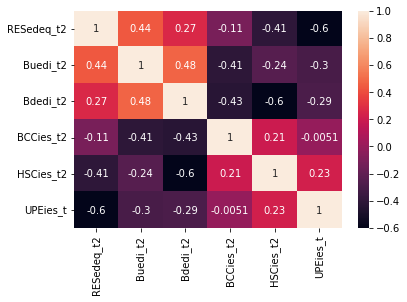

droped:['BCCies_t2']


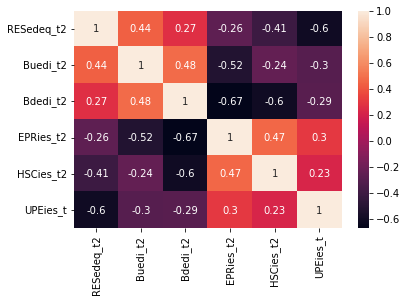

droped:['Bdedi_t2']


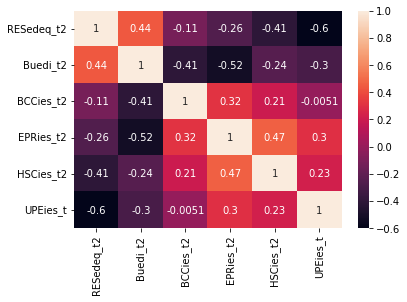

droped:['Buedi_t2']


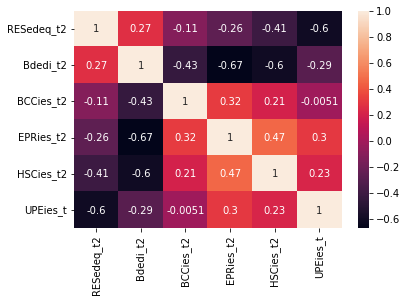

droped:['RESedeq_t2']


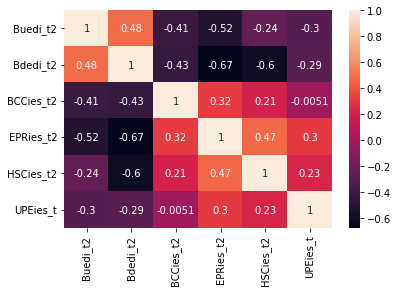

droped:[]


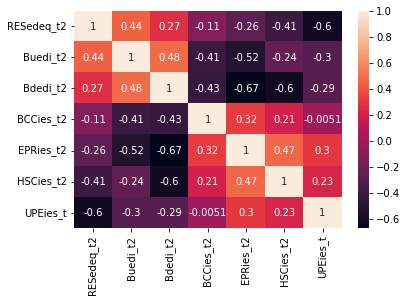

In [ ]:


for i in range(len(datasets)):
  ax = sns.heatmap(datasets[i][1].corr(), annot = True,)
  print(datasets[i][0])
  plt.show()  

# Clustering with origianl dataframe

droped:['UPEies_t', 'HSCies_t2']


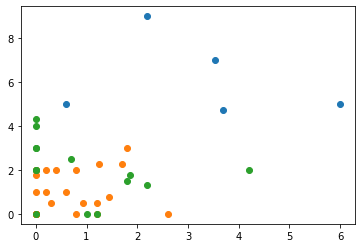

droped:['UPEies_t', 'EPRies_t2']


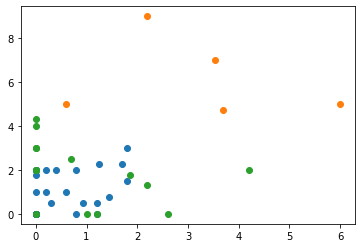

droped:['EPRies_t2', 'HSCies_t2']


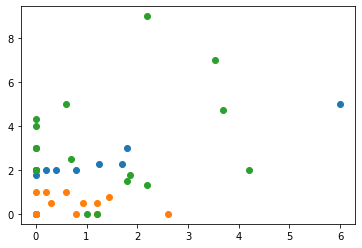

droped:['UPEies_t', 'BCCies_t2']


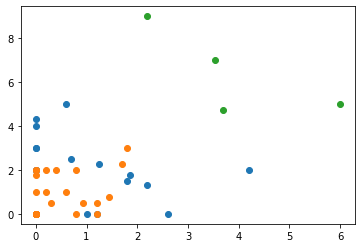

droped:['HSCies_t2', 'BCCies_t2']


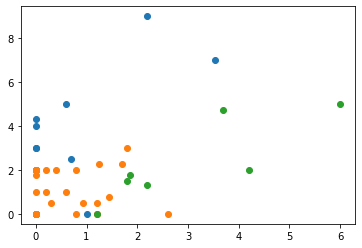

droped:['EPRies_t2', 'BCCies_t2']


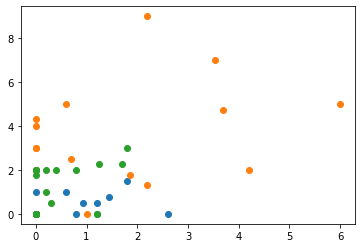

droped:['UPEies_t', 'Bdedi_t2']


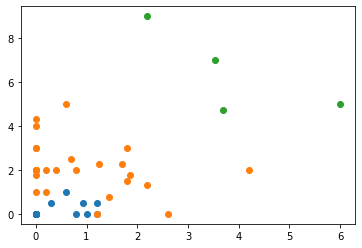

droped:['Bdedi_t2', 'HSCies_t2']


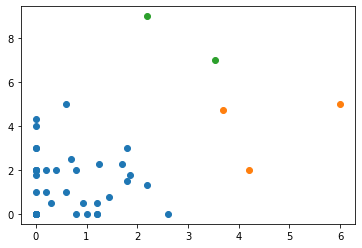

droped:['Bdedi_t2', 'EPRies_t2']


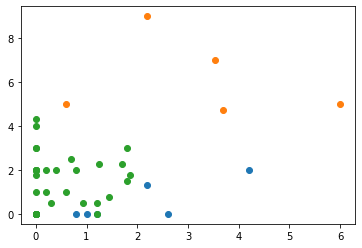

droped:['Bdedi_t2', 'BCCies_t2']


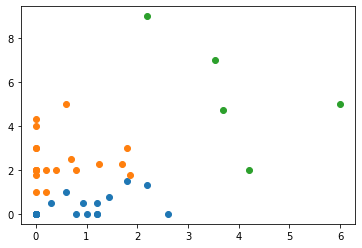

droped:['UPEies_t', 'Buedi_t2']


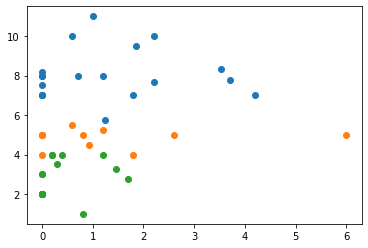

droped:['Buedi_t2', 'HSCies_t2']


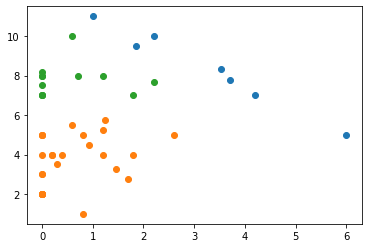

droped:['Buedi_t2', 'EPRies_t2']


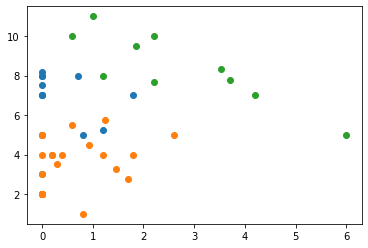

droped:['Buedi_t2', 'BCCies_t2']


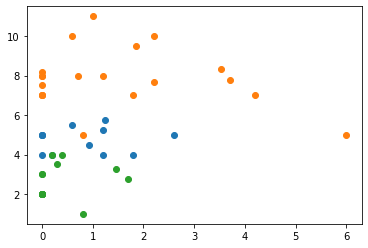

droped:['Buedi_t2', 'Bdedi_t2']


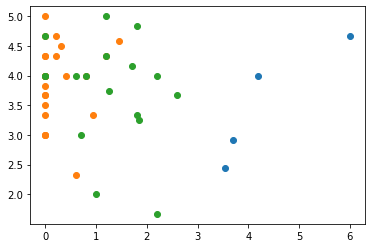

droped:['UPEies_t', 'RESedeq_t2']


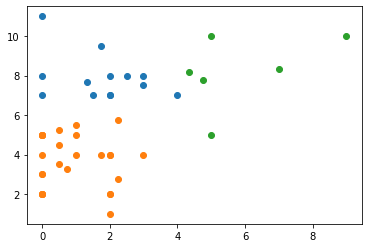

droped:['RESedeq_t2', 'HSCies_t2']


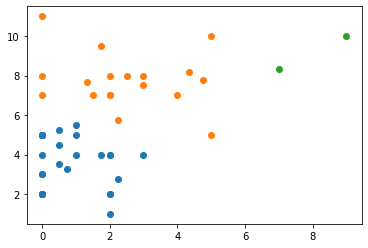

droped:['EPRies_t2', 'RESedeq_t2']


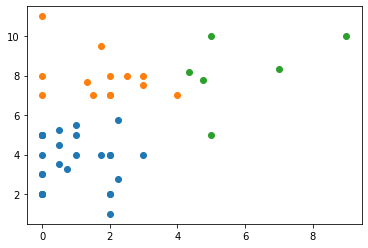

droped:['RESedeq_t2', 'BCCies_t2']


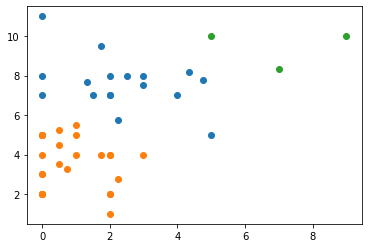

droped:['Bdedi_t2', 'RESedeq_t2']


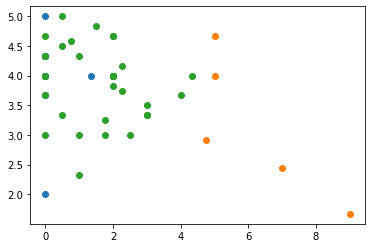

droped:['Buedi_t2', 'RESedeq_t2']


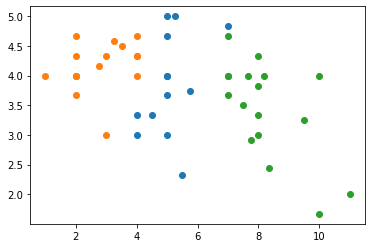

droped:['UPEies_t']


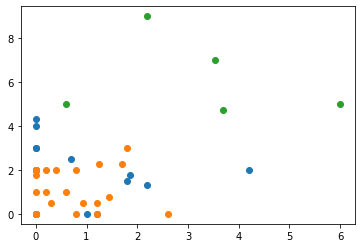

droped:['HSCies_t2']


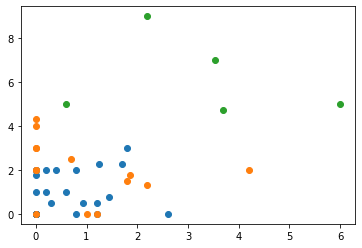

droped:['EPRies_t2']


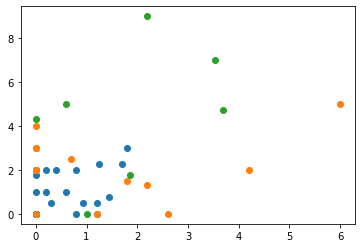

droped:['BCCies_t2']


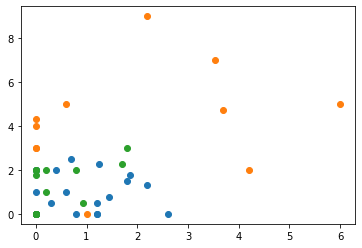

droped:['Bdedi_t2']


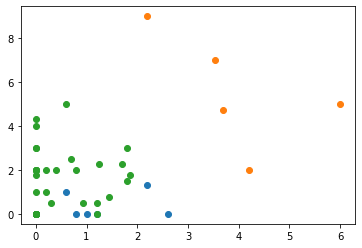

droped:['Buedi_t2']


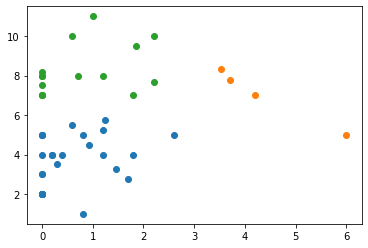

droped:['RESedeq_t2']


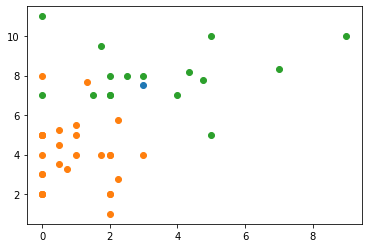

droped:[]


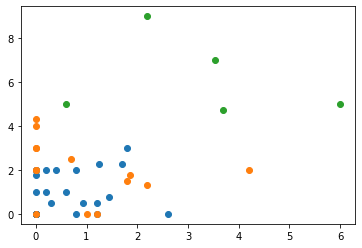

In [ ]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot


X_embedded=[]
labels_nocomps=[]
for i in range (0,len(datasets)):
    df=datasets[i][1]
    datasets[i][1]=df.replace(np.nan, df.mean())
    XXXX=np.array(datasets[i][1])
   
    # gaussian mixture clustering

    # define dataset
    XX=XXXX
    # define the model
    model = GaussianMixture(n_components=n_C)
    # fit the model
    model.fit(XX)
    # assign a cluster to each example
    yhat = model.predict(XX)
    labels_nocomps.append(yhat)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
	# get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
	# create scatter of these samples
        pyplot.scatter(XX[row_ix, 0], XX[row_ix, 1])
    # show the plot
    
    print(datasets[i][0])
    pyplot.show()
    

# Clustering with PCA

droped:['UPEies_t', 'HSCies_t2']


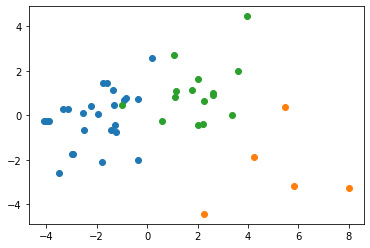

droped:['UPEies_t', 'EPRies_t2']


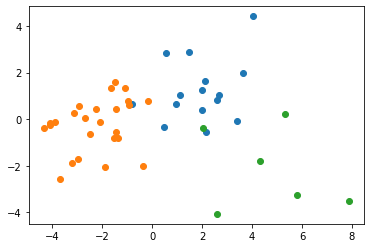

droped:['EPRies_t2', 'HSCies_t2']


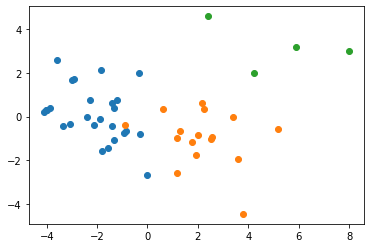

droped:['UPEies_t', 'BCCies_t2']


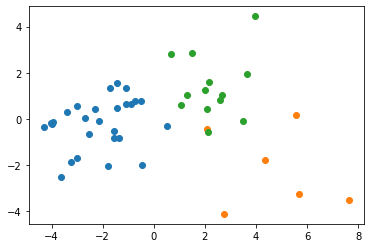

droped:['HSCies_t2', 'BCCies_t2']


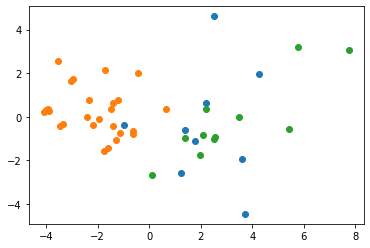

droped:['EPRies_t2', 'BCCies_t2']


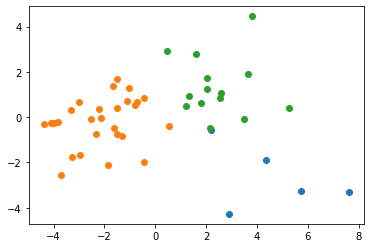

droped:['UPEies_t', 'Bdedi_t2']


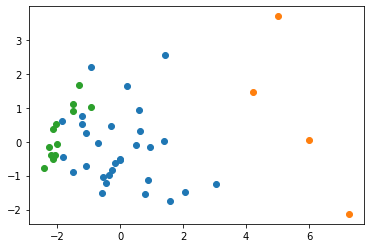

droped:['Bdedi_t2', 'HSCies_t2']


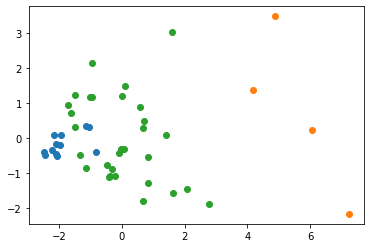

droped:['Bdedi_t2', 'EPRies_t2']


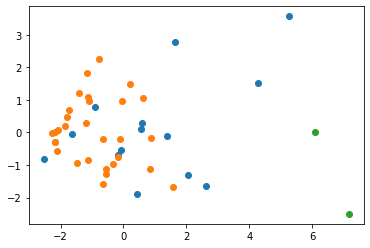

droped:['Bdedi_t2', 'BCCies_t2']


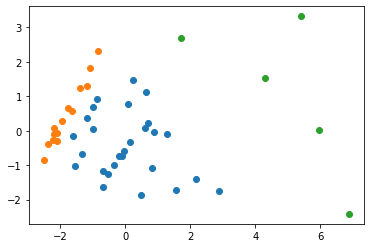

droped:['UPEies_t', 'Buedi_t2']


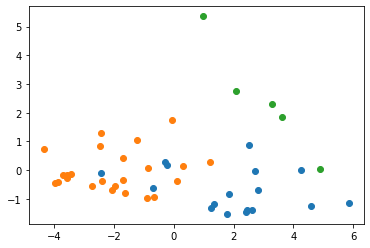

droped:['Buedi_t2', 'HSCies_t2']


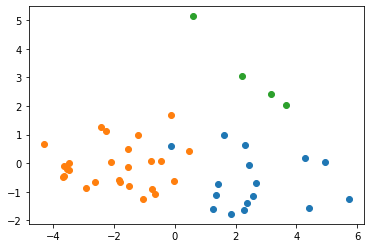

droped:['Buedi_t2', 'EPRies_t2']


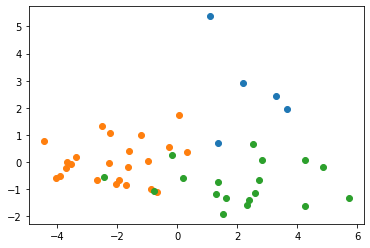

droped:['Buedi_t2', 'BCCies_t2']


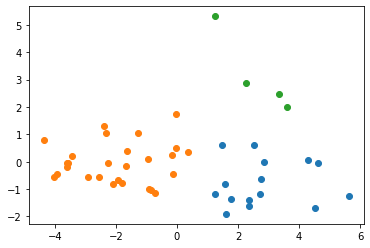

droped:['Buedi_t2', 'Bdedi_t2']


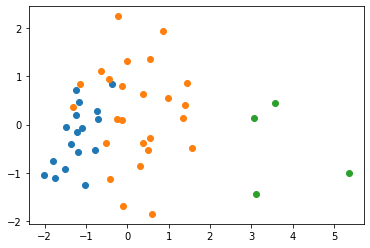

droped:['UPEies_t', 'RESedeq_t2']


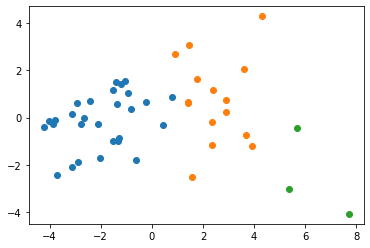

droped:['RESedeq_t2', 'HSCies_t2']


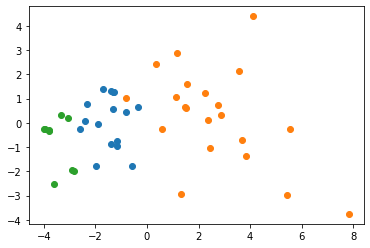

droped:['EPRies_t2', 'RESedeq_t2']


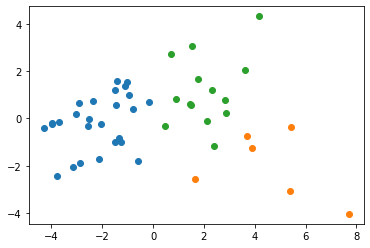

droped:['RESedeq_t2', 'BCCies_t2']


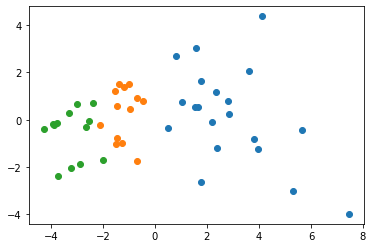

droped:['Bdedi_t2', 'RESedeq_t2']


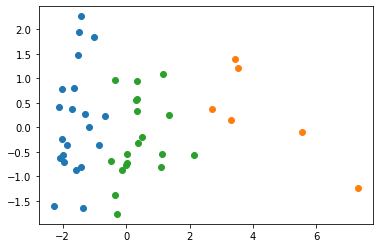

droped:['Buedi_t2', 'RESedeq_t2']


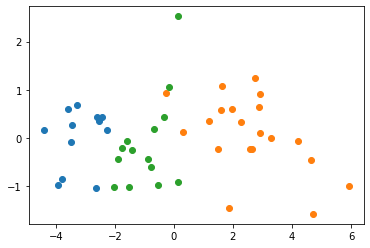

droped:['UPEies_t']


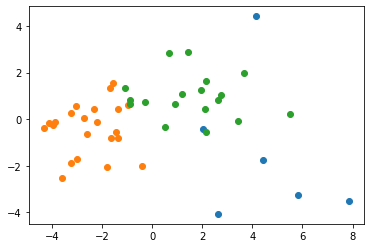

droped:['HSCies_t2']


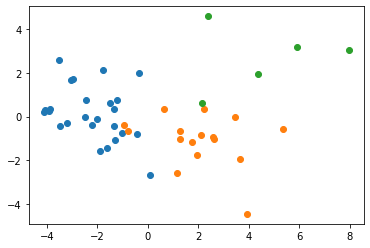

droped:['EPRies_t2']


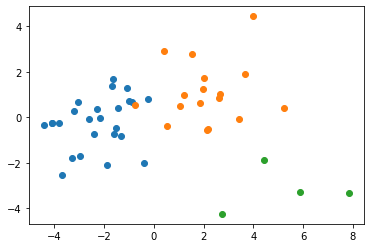

droped:['BCCies_t2']


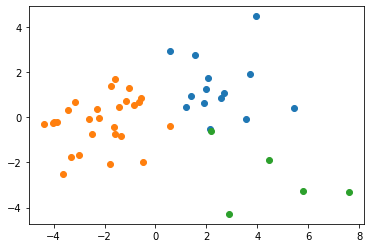

droped:['Bdedi_t2']


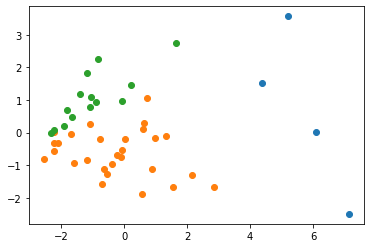

droped:['Buedi_t2']


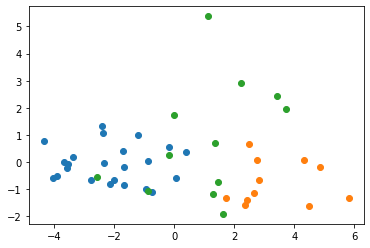

droped:['RESedeq_t2']


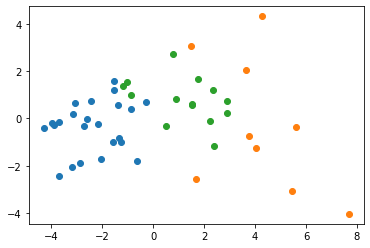

droped:[]


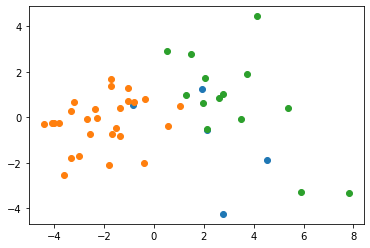

In [ ]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
from sklearn.decomposition import PCA
X_embedded=[]
labels_pca=[]
for i in range (0,len(datasets)):
    df=datasets[i][1]
    datasets[i][1]=df.replace(np.nan, df.mean())
    XXX=np.array(datasets[i][1])
    pca = PCA(n_components=3)
    pca.fit(XXX)
   
    # gaussian mixture clustering

    # define dataset
    XX=pca.transform(XXX)
    # define the model
    model = GaussianMixture(n_components=n_C)
    # fit the model
    model.fit(XX)
    # assign a cluster to each example
    yhat = model.predict(XX)
    labels_pca.append(yhat)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
	# get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
	# create scatter of these samples
        pyplot.scatter(XX[row_ix, 0], XX[row_ix, 1])
    # show the plot
    
    print(datasets[i][0])
    pyplot.show()
    

# Clustering with TSNE

For the above datasets, for instance 6 , or 5 , we will apply TSNE algorithm. We then feedforward the TSNE's output to the gaussian mixture algorithms to do labeling.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['UPEies_t', 'HSCies_t2']


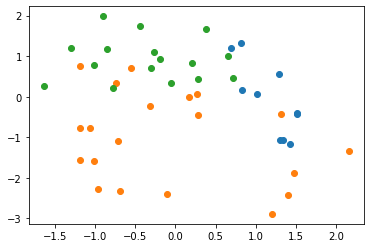

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['UPEies_t', 'EPRies_t2']


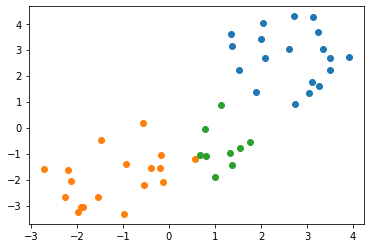

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['EPRies_t2', 'HSCies_t2']


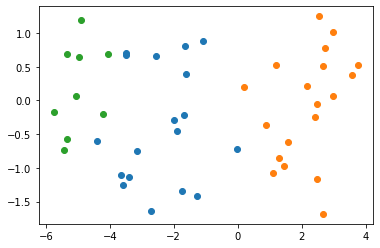

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['UPEies_t', 'BCCies_t2']


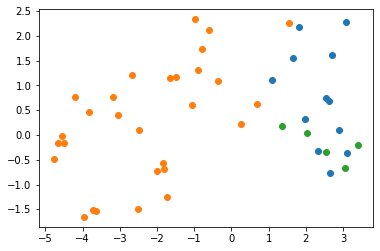

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['HSCies_t2', 'BCCies_t2']


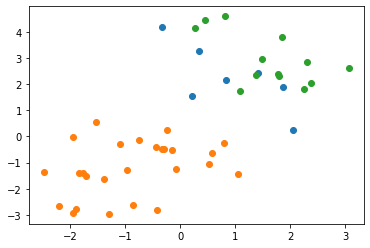

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['EPRies_t2', 'BCCies_t2']


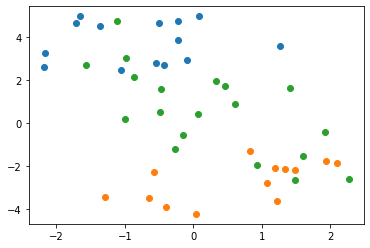

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['UPEies_t', 'Bdedi_t2']


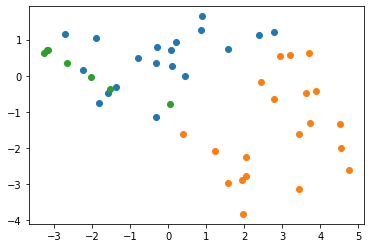

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['Bdedi_t2', 'HSCies_t2']


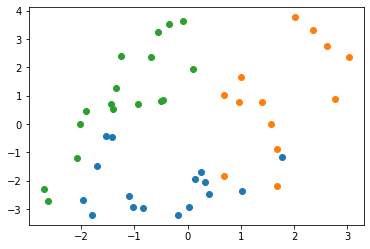

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['Bdedi_t2', 'EPRies_t2']


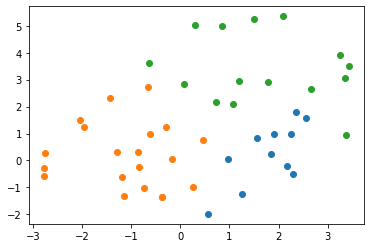

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['Bdedi_t2', 'BCCies_t2']


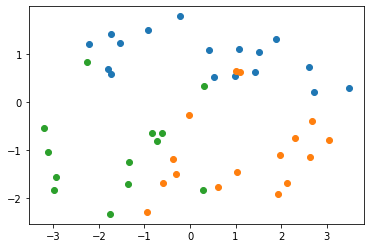

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['UPEies_t', 'Buedi_t2']


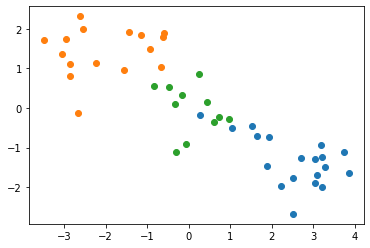

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['Buedi_t2', 'HSCies_t2']


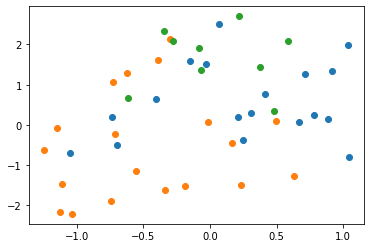

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['Buedi_t2', 'EPRies_t2']


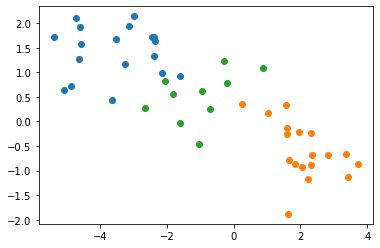

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['Buedi_t2', 'BCCies_t2']


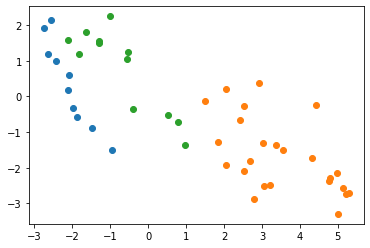

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['Buedi_t2', 'Bdedi_t2']


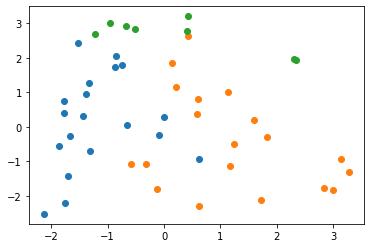

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['UPEies_t', 'RESedeq_t2']


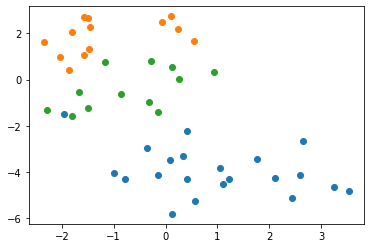

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['RESedeq_t2', 'HSCies_t2']


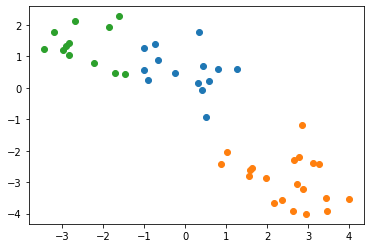

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['EPRies_t2', 'RESedeq_t2']


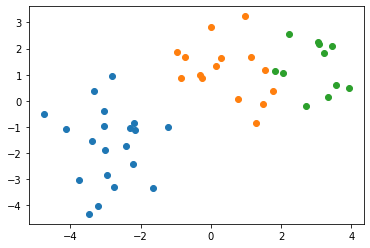

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['RESedeq_t2', 'BCCies_t2']


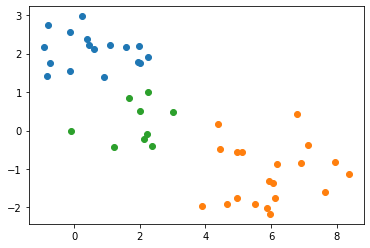

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['Bdedi_t2', 'RESedeq_t2']


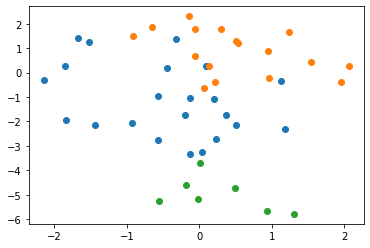

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['Buedi_t2', 'RESedeq_t2']


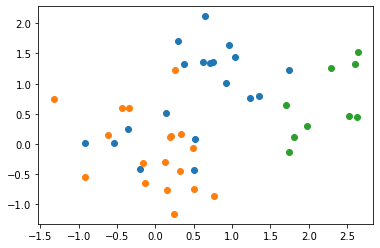

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['UPEies_t']


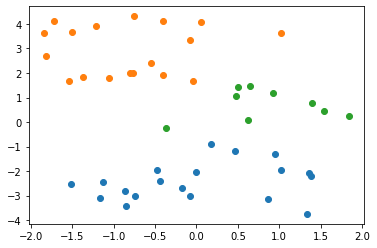

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['HSCies_t2']


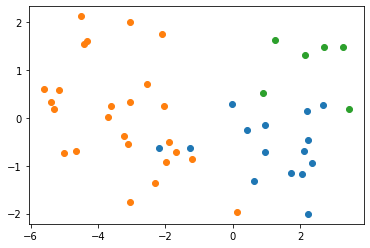

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['EPRies_t2']


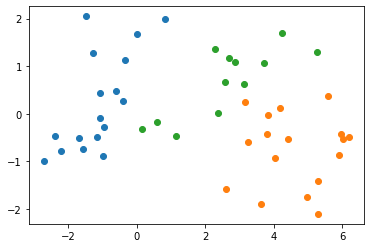

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['BCCies_t2']


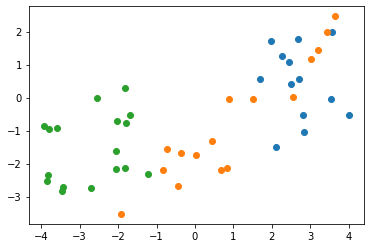

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['Bdedi_t2']


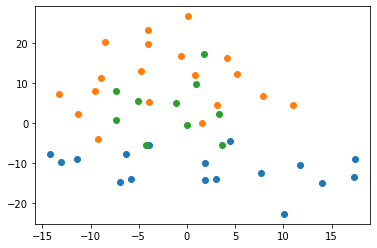

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['Buedi_t2']


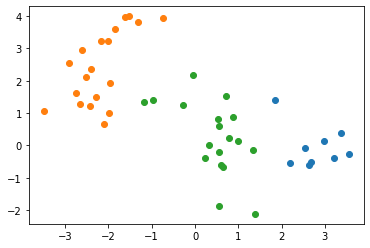

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:['RESedeq_t2']


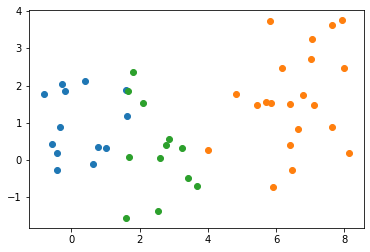

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


droped:[]


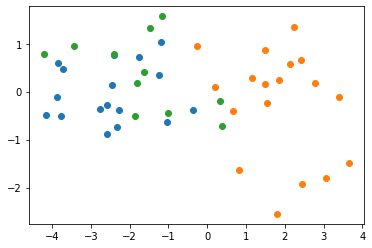

In [ ]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
from sklearn.manifold import TSNE

X_embedded=[]
labels=[]
for i in range (0,len(datasets)):
    df=datasets[i][1]
    datasets[i][1]=df.replace(np.nan, df.mean())
    X=np.array(datasets[i][1])
    tsne = TSNE(n_components=3,perplexity=15.0,learning_rate=10, n_iter=10000)
    X_embedded.append(tsne.fit_transform(X))
   
    # gaussian mixture clustering

    # define dataset
    XX=tsne.fit_transform(X)
    # define the model
    model = GaussianMixture(n_components=n_C)
    # fit the model
    model.fit(XX)
    # assign a cluster to each example
    yhat = model.predict(XX)
    labels.append(yhat)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
	# get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
	# create scatter of these samples
        pyplot.scatter(XX[row_ix, 0], XX[row_ix, 1])
    # show the plot
    
    print(datasets[i][0])
    pyplot.show()
    

# Below just analyze with TSNE

In [ ]:
Labels=[]
for i in range(len(labels)):
    a=[]
    for j in range(n_C):
      b=[]
      for k in range(len(datasets[0][1])):
        if labels[i][k]==j:
          b.append(k)
      a.append(b)
    Labels.append(a)
    # for k in range(n_C):
      # b=[]
Labels[0]

[[1, 5, 14, 16, 17, 21, 26, 27, 36, 43],
 [0, 3, 6, 8, 9, 12, 13, 18, 19, 20, 24, 28, 29, 33, 34, 35, 37, 40, 42, 44],
 [2, 4, 7, 10, 11, 15, 22, 23, 25, 30, 31, 32, 38, 39, 41, 45]]

In [ ]:
# dfss=datasets[0][1]
datasets[0][1].iloc[Labels[0][0],:]

,RESedeq_t2,Buedi_t2,Bdedi_t2,BCCies_t2,EPRies_t2
159,1.7,2.25,2.75,4.165,2.940
480,0.0,1.75,4.00,3.000,3.375
906,0.0,2.00,2.00,4.000,3.630
1035,0.0,1.00,5.00,3.000,3.750
1036,0.6,1.00,5.50,2.330,4.130
1208,0.0,2.00,2.00,4.000,3.750
1456,0.2,2.00,4.00,4.670,4.000
1490,0.4,2.00,4.00,4.000,3.630
1617,1.8,3.00,4.00,3.330,3.500
1925,0.8,2.00,1.00,4.000,3.130


# Heatmap Correlation after clustering for each Cluster

In [ ]:
for i in range(len(Labels)):
  for j in range(n_C):
    df=datasets[i][1].iloc[Labels[i][j],:]
    ax = sns.heatmap(df.corr(), annot = True,)
    print(datasets[i][0],'cluster'+str(j))
    plt.show()  

In [ ]:
datasets[r]

In [ ]:
set([1, 2,5]) - set([2, 3,4])

{1, 5}

In [ ]:
r=len(datasets)-1
Corresponding_clusters=[]
for i in range(len(Labels)-2):
  b=[]
  for j in range(n_C):
    a=[]
    for k in range(n_C):
      a.append(len(list(set(Labels[r][j]) - set(Labels[i][k]))))
    temp=a.index(min(a))
    g=1-(min(a)/len(Labels[r][j]))
    b.append([j,temp,g])
  Corresponding_clusters.append(b)


print("two first elements is Corresponding_clusters and the third elemnts is rate of likeness")
Corresponding_clusters

two first elements is Corresponding_clusters and the third elemnts is rate of likeness


[[[0, 2, 0.5294117647058824], [1, 1, 1.0], [2, 2, 0.6363636363636364]],
 [[0, 1, 1.0], [1, 0, 1.0], [2, 2, 0.8181818181818181]],
 [[0, 0, 0.5294117647058824],
  [1, 1, 0.9444444444444444],
  [2, 0, 0.7272727272727273]],
 [[0, 1, 1.0], [1, 0, 0.6666666666666667], [2, 1, 1.0]],
 [[0, 1, 1.0], [1, 2, 0.7222222222222222], [2, 1, 0.8181818181818181]],
 [[0, 0, 0.7647058823529411],
  [1, 1, 0.7222222222222222],
  [2, 2, 0.9090909090909091]],
 [[0, 0, 0.5882352941176471],
  [1, 0, 0.38888888888888884],
  [2, 1, 0.8181818181818181]],
 [[0, 0, 0.4117647058823529],
  [1, 2, 0.4444444444444444],
  [2, 0, 0.5454545454545454]],
 [[0, 0, 0.47058823529411764],
  [1, 2, 0.6666666666666667],
  [2, 1, 0.8181818181818181]],
 [[0, 0, 0.47058823529411764],
  [1, 2, 0.4444444444444444],
  [2, 1, 0.6363636363636364]],
 [[0, 1, 0.8823529411764706], [1, 0, 1.0], [2, 2, 0.8181818181818181]],
 [[0, 0, 0.5294117647058824], [1, 1, 1.0], [2, 0, 0.8181818181818181]],
 [[0, 0, 0.8823529411764706], [1, 1, 1.0], [2, 2,

to check whether deleting features effects individuals

In [ ]:
noeffect=[]
for i in range(len(Corresponding_clusters)):
  a=[]
  for j in range(n_C):
    a.append(list(set(Labels[i][Corresponding_clusters[i][j][1]]).intersection(set(Labels[r][j]))))
  noeffect.append(a)
noeffect

[[[2, 4, 38, 39, 7, 41, 11, 22, 25],
  [33, 34, 3, 35, 37, 6, 8, 9, 40, 42, 12, 13, 44, 19, 20, 24, 28, 29],
  [32, 10, 45, 15, 23, 30, 31]],
 [[1, 2, 4, 5, 36, 7, 38, 39, 41, 11, 43, 14, 21, 22, 25, 26, 27],
  [33, 34, 3, 35, 37, 6, 8, 9, 40, 42, 12, 13, 44, 19, 20, 24, 28, 29],
  [32, 10, 45, 15, 16, 17, 18, 23, 30]],
 [[1, 2, 36, 5, 38, 7, 39, 26, 27],
  [33, 34, 3, 35, 37, 6, 8, 9, 40, 42, 44, 13, 19, 20, 24, 28, 29],
  [32, 10, 45, 15, 16, 17, 23, 30]],
 [[1, 2, 4, 5, 36, 7, 38, 39, 41, 11, 43, 14, 21, 22, 25, 26, 27],
  [33, 34, 35, 37, 6, 8, 9, 44, 13, 19, 20, 29],
  [0, 32, 10, 45, 15, 16, 17, 18, 23, 30, 31]],
 [[1, 2, 4, 5, 36, 7, 38, 39, 41, 11, 43, 14, 21, 22, 25, 26, 27],
  [33, 34, 3, 37, 6, 8, 9, 42, 44, 13, 19, 24, 28],
  [32, 10, 45, 15, 16, 17, 23, 30, 31]],
 [[1, 4, 5, 36, 7, 41, 11, 43, 14, 21, 25, 26, 27],
  [33, 34, 3, 35, 37, 6, 8, 40, 42, 13, 19, 24, 28],
  [0, 32, 10, 45, 15, 16, 17, 18, 23, 30]],
 [[1, 36, 5, 38, 7, 43, 14, 21, 26, 27],
  [33, 34, 37, 6, 8, 9,

[list([0, 33, 34, 3, 35, 6, 8, 40, 12, 13, 44, 20, 29]),
        list([43, 21, 14]), list([]), list([32, 15, 45, 23]),
        list([1, 36, 37, 5, 7, 39, 26, 27, 28]),
        list([38, 41, 11, 22, 25, 31]), list([4, 10, 16, 17, 30])

In [ ]:
labels

In [ ]:
X1=np.array(df)
type(X1[0][0])

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3,perplexity=15.0,learning_rate=10, n_iter=10000)
X_embedded = tsne.fit_transform(X)


In [ ]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define dataset

# define the model
model = GaussianMixture(n_components=3)
# fit the model
model.fit(X_embedded)
# assign a cluster to each example
yhat = model.predict(X_embedded)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X_embedded[row_ix, 0], X_embedded[row_ix, 1])
# show the plot
pyplot.show()

In [ ]:
yhat

In [ ]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define dataset

# define the model
model = GaussianMixture(n_components=3)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [ ]:
yy-yyy

In [ ]:
X=X1
len(X)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3,perplexity=5.0,learning_rate=50, n_iter=5000)
X_embedded = tsne.fit_transform(X)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
y=kmeans.labels_


In [ ]:

x = X_embedded[:,0]
Y = X_embedded[:,1]
# z = X_embedded[:,2]



ax = plt.axes(projection='3d')
ax.scatter( x, Y, c=y, linewidth=0.5);

In [ ]:
len(X[0])

In [ ]:
## importing the required packages
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
             discriminant_analysis, random_projection)
## Loading and curating the data
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30
## Function to Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)     
    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    if hasattr(offsetbox, 'AnnotationBbox'):
        ## only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                ## don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

#----------------------------------------------------------------------
## Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')
## Computing PCA
print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))
## Computing t-SNE
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))
plt.show()